## 9/11: Probability Distributions: Binomial Case Study  
Isabella Turco  
Quantitative Neuro Core

In [ ]:
import random as rnd
import numpy as np 
import collections 
import matplotlib.pyplot as plt 
import time 

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion
from scipy.optimize import curve_fit

### Binomial Distribution

#### Exercise 1

Probability of Each Quantal Event:  [0.8 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0. ]


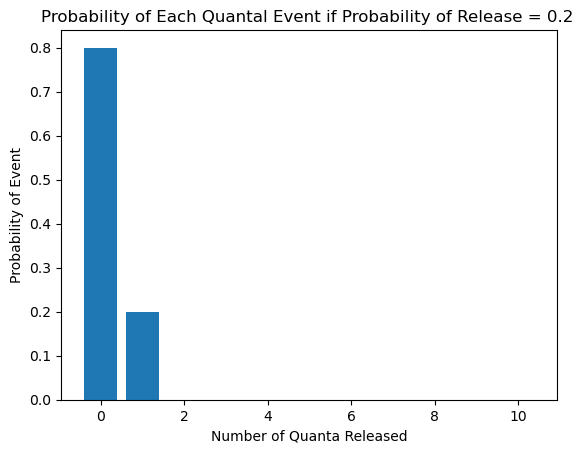

In [ ]:
n_quanta = 10 
p_release = 0.2
possible_events = np.arange(0,11,1)
p_each_event = binom.pmf(possible_events, 1, p_release)
print("Probability of Each Quantal Event: ", p_each_event)
plt.bar(possible_events, p_each_event)
plt.xlabel("Number of Quanta Released")
plt.ylabel("Probability of Event")
plt.title(f"Probability of Each Quantal Event if Probability of Release = {p_release} ")
plt.show()

#### Exercise 2

In [ ]:
quanta_available = np.arange(0,15,1)
measured_n2_quanta = 8
all_p_release = np.linspace(0,1,11)
p_8_quanta = binom.pmf(measured_n2_quanta, 1, all_p_release)
print(f"Probability of 8 Quanta Released if Release Probability = {all_p_release[1]}: {p_8_quanta[1]}")
print(f"Probability of 8 Quanta Released if Release Probability = {all_p_release[7]}: {p_8_quanta[7]}")
print(p_8_quanta)
print(f"Maximum = {max(p_8_quanta)}")
all_p_release_higher_res = np.linspace(0,1,22)
p_8_quanta_higher_res = binom.pmf(measured_n2_quanta, 1, all_p_release_higher_res)
print(p_8_quanta_higher_res)

Probability of 8 Quanta Released if Release Probability = 0.1: 0.0
Probability of 8 Quanta Released if Release Probability = 0.7000000000000001: 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Maximum = 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Exercise 3

In [ ]:
measured_n3_quanta = 5
theoretical_p_release = 0.1 
p_5_quanta_1 = binom.pmf(measured_n3_quanta, 1, theoretical_p_release)
total_likelihood = p_8_quanta[7] * p_5_quanta_1
print(f"Total Likelihood = {total_likelihood}")
log_likelihood = np.log(p_8_quanta[7]) + np.log(p_5_quanta_1)
print(f"Log Likelihood = {log_likelihood}")

p_5_quanta = binom.pmf(measured_n3_quanta, 1, all_p_release)
total_likelihood_all = p_8_quanta * p_5_quanta
print(f"Total Likelihood = {total_likelihood_all}")
log_likelihood_all = np.log(p_8_quanta) + np.log(p_5_quanta)
print(f"Log Likelihood = {log_likelihood_all}")

Total Likelihood = 0.0
Log Likelihood = -inf
Total Likelihood = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Log Likelihood = [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]


/var/folders/c4/ps_jx2k53xbby28653g_4lqc0000gp/T/ipykernel_42196/935059123.py:6: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.log(p_8_quanta[7]) + np.log(p_5_quanta_1)
/var/folders/c4/ps_jx2k53xbby28653g_4lqc0000gp/T/ipykernel_42196/935059123.py:12: RuntimeWarning: divide by zero encountered in log
  log_likelihood_all = np.log(p_8_quanta) + np.log(p_5_quanta)


#### Exercise 4

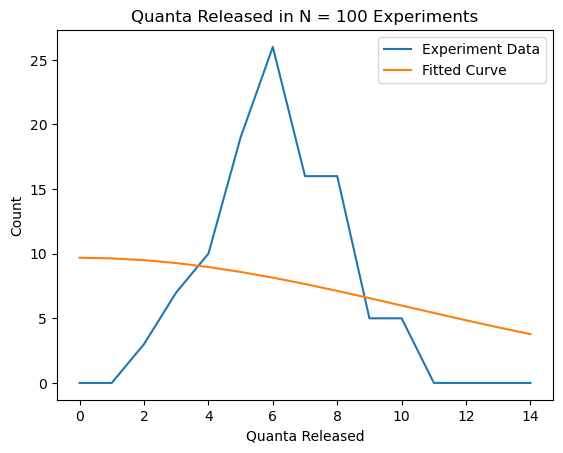

In [ ]:
measured_releases = np.arange(0,15,1)
release_counts = [0, 0, 3, 7, 10, 19, 26, 16, 16, 5, 5, 0, 0, 0, 0]

plt.plot(measured_releases, release_counts, label = "Experiment Data")
plt.xlabel("Quanta Released")
plt.ylabel("Count")

def gaussian(x, A, B):
    y = A * np.exp(-1 * B * x**2)
    return y

parameters, covariance = curve_fit(gaussian, measured_releases, release_counts)
fitted_curve = gaussian(measured_releases, parameters[0], parameters[1])

plt.plot(measured_releases, fitted_curve, label = "Fitted Curve")
plt.title("Quanta Released in N = 100 Experiments")
plt.legend()
plt.show()

#### Exercise 5

In [ ]:
true_p_release = 0.3
measured_n5_quanta = 7 

#### Bonus Exercise